https://arxiv.org/pdf/1609.02907.pdf%EF%BC%89

table 값 체크 한 번 더 하기

gnn은 최근 다양한 분야에서 그래프 데이터 분석하는 모델이 되어왔다. 동적 데이터를 다루기 위해서 gnn은 stgnn아래 사용되어 왔다. stgnn이 다변량 시계열 채널 간의 미세한 공간적 연관성을 명시적으로 모델링할 수 있어, 기본 그래프 구조는 고정되어 있지만 노드 특성이 시간에 따라 동적으로 업데이트되는 시나리오에  특히 적합하다. 초기 연구에서는 rnn을 사용하여 시간 종속성을 캡쳐하고 gnn을 사용하여 공간 관계를 모델링하여 다변량 시계열을 예측하는 데 사용되는 순환 기반 stgnn이 제안 되었다. 이후로 stgnn 분야는 다양한 시계열 응용 프로그램에 대처하기 위해 제안된 다양한 아키텍쳐로 번성했다. 이 중에는 예측과 분류 같은 응용이 포함되어 있다. 다변량 시계열 이상치감지를 위해 최근에 stgnn을 활용하여 단계적 예측을 수행하고 정규화된 예측 오류를 계산하여 이상을 감지하는 GDn을 제안했다. MTAD-GAT는 이상을 감지하기 위해 연합 예측 및 재구성 기반 stgnn을 활용한다. Fusagnet은 stgnn의 희소 제약된 연합 최적화를 통해 mtad-gat를 확장한다. 
현재의 깊은 감지 기술은 중요한 발전을 이루었지만, 현재의 불규칙한 시계열 설정에서는 각 타임 스탬프에서 실제 관측값이 완전히 사용 가능해야 하는데, 이는 불가능하다. 이 연구에서는 dg-node 공간 및 시간 모듈을 사용하여 불규칙한 시계열을 처리하기 위해 stgnn을 활용하고, 실시간으로 강력학 이상 감지를 달성하기 위해 gst-pro의 원래 예측에 대한 간단한 분포 접근 방식을 제안한다.


----


related works
gcn은 cnn이 graph로 효율적으로 확장된 분야로 증명되어 왔다. 그래프 도메인에서 , 특히 입력 데이터가 시간 변수인 것을 처리하기 위해 동적 그래프의 개념이 사용되었으며,  이 그래프는 시간에 따라 정보가 변하기 때문에 시간과 공간의 정보를 캡쳐하여 사용한다면 효과적일 것이다.  이에 dcrnn과 stgcn이 제안되었고, 이러한 방법이다. 
dcrnn에서는 Missing values are excluded in calculating these metrics가 되었고,
stgcn에서는 . The linear interpolation method is used to fill missing values after data cleaning. In addition, data input are normalized by Z-Score method. 이렇게 되었다.
st-gcn에서는 This transformation is interpolated for intermediate frames to generate a effect as if we smoothly move the view point during playback. We name this augmentation as random moving. 이렇게 보간하는 방법을 사용하기도 했다.
st data와 관련하여 method가 제안될때 다양한 방법으로 irregular에서 regular로 변환하여 사용하려는 시도가 되어져 왔고 대부분 simple handle하는 방법을 사용했다. 하지만 이는 실제 관측값이 아니며, 이는 데이터를 예측하거나 분류할때 영향을 끼쳐 낮은 accuracy로 이끌 수 있다. 이를 개선할 수 있는 방법이 제안된다면 기존에 제안된 st data에 사용된 방법들의 더 정확한 예측값을 얻는 등 효과적인 결과를 이끌 수 있을 것이다. 이에 우리 연구에서는 missing 값을 처리 후 데이터의 normal trend를 활용하여 self consistecy 속성을 이용해 데이터의 예측 정확도를 키울 수 있는 접근 방식을 제안한다.


The validation set is comprised of the final 20% of the training data.

1. mrate 에 따라 mse
2. time/node ration에 따라 mse
3. 기타(interpolation 등)

# Conditions

| Model               | FiveVTS | Chickenpox | Pedalme | Wikimath | Windmillsmall | MontevideoBus |
|---------------------|---------|------------|---------|----------|---------------|---------------|
| Max iter.           | 30      | 30         | 30      | 30       | 30            | 30            |
| Epochs              | 50      | 50         | 50      | 50       | 50            | 50            |
| Lags                | 2       | 4          | 4       | 8        | 8             | 4             |
| Interpolation       | linear  | linear     | nearest | linear   | linear        | nearest       |
| Filters             |         |            |         |          |               |               |
| GConvGRU            | 12      | 16         | 12      | 12       | 12            | 12            |
| GConvLSTM           | 12      | 32         | 2       | 64       | 16            | 12            |
| GCLSTM              | 4       | 16         | 4       | 64       | 16            | 12            |
| LRGCN               | 4       | 8          | 8       | 32       | 12            | 2             |
| DyGrEncoder         | 12      | 12         | 12      | 12       | 12            | 12            |
| EvolveGCNH          | No need | No need    | No need | No need  | No need       | No need       |
| EvolveGCNO          | No need | No need    | No need | No need  | No need       | No need       |
| TGCN                | 12      | 12         | 12      | 12       | 12            | 8             |
| DCRNN               | 2       | 16         | 8       | 12       | 4             | 12            |


# Import

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import pickle

In [526]:

import plotly.io as pio

In [527]:
pd.options.plotting.backend = "plotly"
pio.templates.default = "plotly_white"

# Data

In [589]:
df = pd.read_csv('../Data/Body_Results.csv').query("method!='GNAR'").iloc[:,1:]
df.head()

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
0,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729374,80.985221,GConvGRU
1,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.729082,80.891788,GConvGRU
2,fivenodes,IT-STGCN,0.0,NaN,2,12.0,NaN,50.0,0.731600,114.492592,GConvGRU
3,fivenodes,IT-STGCN,0.0,NaN,2,12.0,NaN,50.0,0.735026,115.544274,GConvGRU
4,fivenodes,STGCN,0.0,NaN,2,12.0,NaN,50.0,0.727182,102.783140,GConvGRU


In [574]:
nearest_fivenodes = pd.read_csv('../Data/Add/nearest_fivenodes.csv').query("method!='GNAR'")
nearest_fivenodes.head()

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
0,fivenodes,STGCN,0.7,rand,2,12.0,linear,50.0,1.892262,81.976547,GConvGRU
1,fivenodes,STGCN,0.7,rand,2,12.0,nearest,50.0,2.211288,87.803869,GConvGRU
2,fivenodes,STGCN,0.8,rand,2,12.0,linear,50.0,2.072818,103.648742,GConvGRU
3,fivenodes,STGCN,0.8,rand,2,12.0,nearest,50.0,2.566474,98.340096,GConvGRU
4,fivenodes,IT-STGCN,0.7,rand,2,12.0,linear,50.0,1.244197,123.855833,GConvGRU


In [575]:
nearest_pedalme = pd.read_csv('../Data/Add/nearest_pedalme.csv').query("method!='GNAR'")
nearest_pedalme.head()

,dataset,method,mrate,mtype,lags,nof_filters,inter_method,epoch,mse,calculation_time,model
0,pedalme,STGCN,0.3,rand,4,12.0,linear,50.0,1.778283,5.450079,GConvGRU
1,pedalme,STGCN,0.3,rand,4,12.0,nearest,50.0,1.475427,5.581202,GConvGRU
2,pedalme,STGCN,0.6,rand,4,12.0,linear,50.0,2.140820,5.811750,GConvGRU
3,pedalme,STGCN,0.6,rand,4,12.0,nearest,50.0,1.750110,5.835120,GConvGRU
4,pedalme,IT-STGCN,0.3,rand,4,12.0,linear,50.0,1.335496,6.442671,GConvGRU


# 1. Missing Rate

## 1.1 Trend

- 실험 결과에 대한 첫번 째 접근은 다음과 같다. Figure 1의 결과는 각 결측값 비율에 따라 정리한 데이터셋에 대한 결과이다. Classic과 Proposed는 결측값 비율이 점점 증가하면서 평균제곱오차도 함께 증가하는 경향을 보였다. 특히, Classic과 Proposed 각각에 대한 trendline을 비교해본 결과, 결측값 비율이 증가할 수록 Classic에 비해 우리가 제안한 방법((Proposed)의 평균제곱오차가 느리게 증가하는 경향을 띄었다. 반면, Classic 모델은 오히려 빠르게 증가하는 경향을 띄었다. 결측값 비율이 커질수록 우리가 제안하는 방법이 비교적 낮은 오차 내에서 값을 예측해낸다는 것을 알 수 있었다.
- The initial approach to the experimental results is as follows. Figure \ref{} illustrates the outcomes for six datasets organized based on varying levels of missing data, with nine models employed. As the missing data rates increase, both Classic and Proposed models exhibit a tendency for the mean squared error (MSE) to rise. Particularly noteworthy is the comparison between the trendlines of Classic and Proposed: as the rate of missing values increases, the MSE of the Proposed method tends to increase more gradually compared to Classic. In contrast, the Classic model displays a more rapid increase in MSE. This comparison suggests that as the proportion of missing values grows, our proposed method (Proposed) tends to predict values with a slower increase in MSE compared to the Classic model. It becomes evident that as the missing data rate becomes higher, our proposed method performs relatively well, providing predictions with lower errors compared to the Classic model.

In [514]:
# tidydata = pd.concat([df.query('dataset=="fivenodes" and model=="GConvGRU" and mtype=="rand"')])
# tidydata['mrate'] = tidydata['mrate'].astype(str)
# tidydata = tidydata.sort_values(by=['model','mrate'])

# fig = px.box(tidydata,x='mrate',y='mse',color='method',width=70, log_y=True)


# fig.layout['xaxis']['title']['text']='Missing Rate'
# fig.layout['yaxis']['title']['text']='Mean Square Error'

# fig.data[0]['marker']['color'] = 'blue'
# fig.data[0]['name'] = 'Classic'

# fig.data[1]['marker']['color'] = 'red'
# fig.data[1]['name'] = 'Proposed'

# fig.layout['legend']['title']=''

# fig.update_layout(template="seaborn")
# fig.update_layout(title_text="Randomly Missing Values on FiveVTS")
# fig.update_layout(height=600, width=1800)

# fig.add_trace(go.Scatter(x=tidydata.query('method=="STGCN"').mrate.unique(), y=(tidydata.query('method=="STGCN"')).groupby('mrate')['mse'].mean(), 
#                          mode="lines", name="trendline of Classic", line=dict(color="blue",width=2)))
# fig.add_trace(go.Scatter(x=tidydata.query('method=="STGCN"').mrate.unique(), y=(tidydata.query('method!="STGCN"')).groupby('mrate')['mse'].mean(), 
#                          mode="lines", name="trendline of Classic", line=dict(color="red",width=2)))

# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))

# fig

## 1.2 Every model

`1`의 내용에 대한 확장으로. `FiveVTS` 데이터 셋에서 `GConvGRU` 방법 이외에 시도한 다른 Classic 모델들에 대한 결과이다. `GConvGRU`, `GConvLSTM`, `GCLSTM`, `LRGCN`, `DyGrEncoder`, `EvolveGCNH`, `EvolveGCNO`, `TGCN`, `DCRNN` 모델의 결과이며. 첫번째 섹션에서 제시한 결과와 비슷하게 결측값 비율이 증가할 수록 예측값에 대한 오차가 증가하였으며. Proposed가 더 낮은 값을 띄는 경향을 보인 것을 확인할 수 있었다. 다른 데이터 셋에 대한 결과도 결측값이 증가할 수록 오차가 증가하되, 우리가 제안한 방법에 대한 mse값이 낮은 비슷한 경향을 보였으며, 나머지 모델에서 나온 6개의 데이터 셋에 대한 결과는 부록에서 확인할 수 있다.

In [515]:
# tidydata = pd.DataFrame(df.query("dataset=='fivenodes' and mtype=='rand'"))

# tidydata['model'] = pd.Categorical(tidydata['model'], categories=["GConvGRU", "GConvLSTM", "GCLSTM", "LRGCN", "DyGrEncoder", "EvolveGCNH", "EvolveGCNO", "TGCN", "DCRNN"])
# tidydata['method'] = pd.Categorical(tidydata['method'], categories=['STGCN', 'IT-STGCN'])

# tidydata['mrate'] = tidydata['mrate'].astype(str)
# tidydata = tidydata.sort_values(by=['model','mrate'])

# fig = px.box(tidydata,x='mrate',y='mse',color='method',log_y=True,facet_col='model',facet_col_wrap=3)

# fig.layout['xaxis']['title']['text']=''
# fig.layout['xaxis2']['title']['text']='Missing Rate'
# fig.layout['xaxis3']['title']['text']=''
# fig.layout['yaxis']['title']['text']=''
# fig.layout['yaxis4']['title']['text']='MSE(log scale)'
# fig.layout['yaxis7']['title']['text']=''
# fig.layout['legend']['title']='Method'

# fig.layout.xaxis4.showticklabels=True
# fig.layout.xaxis5.showticklabels=True
# fig.layout.xaxis6.showticklabels=True
# fig.layout.xaxis7.showticklabels=True
# fig.layout.xaxis8.showticklabels=True
# fig.layout.xaxis9.showticklabels=True

# fig.layout.yaxis2.showticklabels=True
# fig.layout.yaxis3.showticklabels=True
# fig.layout.yaxis5.showticklabels=True
# fig.layout.yaxis6.showticklabels=True
# fig.layout.yaxis8.showticklabels=True
# fig.layout.yaxis9.showticklabels=True

# fig.layout['legend']['title']=''

# for i in range(0, 9):
#     fig.data[i]['marker']['color'] = 'blue'
#     fig.data[i]['name'] = 'Classic'
# for i in range(9, 18):    
#     fig.data[i]['marker']['color'] = 'red'
#     fig.data[i]['name'] = 'Proposed'

# fig.update_layout(legend=dict(x=1, y=1, traceorder='normal', orientation='v'))
# fig.update_layout(template="seaborn")
# fig.update_layout(title_text="Models on FiveVTS")
# fig.update_layout(height=1200, width=1900)

# fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
# ))

# fig
# # with open('fivenodes_fig.pkl', 'wb') as file:
# #     pickle.dump(fig, file)
# # with open('fivenodes_fig.pkl', 'rb') as file:
# #     fivenodes_fig = pickle.load(file)

# # fivenodes_fig

## 1.3 Six Datasets

- 이번 섹션에서는 데이터의 다양성을 고려하기 위하여 사용된 총 6개의 데이터에 대해 결측값 비율이 높을때(70% 혹은 80%) `GConvGRU` 모델에서 예측과 제안된 방법의 비교 결과를 제시하였다. 대부분의 데이터셋의 결과는 Classic 모델보다 Proposed 결과의 mse 값이 낮게 분포되어 있음을 확인하였다.

In [516]:
# tidydata = pd.concat([df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==12) & 
#            (df['lags']==2) & (df['epoch']==50) & (df['model']=='GConvGRU') & (df['mrate'].isin([0.8]))],
#         df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GConvGRU' & (mrate == 0.8)"),
#           df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & (mrate == 0.8)"),
#           df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='GConvGRU' & (mrate == 0.8)"),
#           df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='GConvGRU' & (mrate == 0.7)"),
#           df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & (mrate == 0.8)")])

# # tidydata = df.query("dataset=='fivenodes' and mtype=='rand' and mrate in [0.7,0.8]")
# tidydata['model'] = pd.Categorical(tidydata['model'], categories=["GConvGRU", "GConvLSTM", "GCLSTM", "LRGCN", "DyGrEncoder", "EvolveGCNH", "EvolveGCNO", "TGCN", "DCRNN"])
# categories=["fivenodes", "chickenpox", "pedalme", "wikimath", "windmillsmall", "monte"]
# tidydata['method'] = pd.Categorical(tidydata['method'], categories=['STGCN', 'IT-STGCN'])

# tidydata = tidydata.sort_values(by='dataset', key=lambda x: x.map({dataset: i for i, dataset in enumerate(categories)}))

# fig = px.strip(tidydata,x='dataset',y='mse',color='method', log_y=True,stripmode='overlay')

# fig.layout['xaxis']['title']['text']='Missing Rate'
# fig.layout['yaxis']['title']['text']='MSE(log scale)'

# # fig.layout.annotations[0].text = 'FiveVTS'
# # fig.layout.annotations[1].text = 'Chickenpox'
# # fig.layout.annotations[2].text = 'Pedalme'
# # fig.layout.annotations[3].text = 'Wikimath'
# # fig.layout.annotations[4].text = 'Windmillsmall'
# # fig.layout.annotations[5].text = 'MontevideoBus'

# # fig.layout['legend']['title']=''

# fig.data[0]['marker']['color'] = 'blue'
# fig.data[0]['name'] = 'Classic'
# fig.data[1]['marker']['color'] = 'red'
# fig.data[1]['name'] = 'Proposed'

# fig.update_layout(template="seaborn")
# fig.update_layout(title_text="GConvGRU on datasets")
# # fig.update_yaxes(matches=None)
# fig.update_layout(height=800, width=1900)
# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
#  ))
# fig

---

**DCRNN 모델의 wikimath 데이터에서 결측값 비율이 낮을 때 대비 높을 때 비교**

- 결측값 비율이 커지니 차이가 커진 mse 값 분포

- 내용
    - wikimath 데이터셋에서 DCRNN 결과에 대하여 결측값 비율이 작은 경우(30%) 대비 큰 경(80%)에 대하여 비교해보았다. wikimath 데이터셋에서 결측값을 주지 않았을떄, mse 값은 0.936±0.002(mean±sd)와 같았다. figure에서 보다시피, 결측값 비율이 30%으로 작을 때는 오차값이 작게 증가하였지만, 결측값의 비율이 80%로 높아졌을떄는 mse값이 확연히 높아진 것을 확인할 수 있었으며, 특히 classic 보다 proposed 의 값이 낮은 모습도 확인할 수 있었다.
    

In [405]:
# # tidydata = pd.concat([df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==12) & 
# #            (df['lags']==2) & (df['epoch']==50) & (df['model']=='GConvGRU') & (df['mrate'].isin([0.3,0.8]))]])
# tidydata = df.query("model=='DCRNN' and dataset=='wikimath' and mrate in [0.3,0.8]")
# tidydata['method'] = pd.Categorical(tidydata['method'], categories=['STGCN', 'IT-STGCN'])

# tidydata['mrate'] = tidydata['mrate'].astype(str)
# tidydata = tidydata.sort_values(by=['model','mrate'])

# fig = px.box(tidydata,x='mrate',y='mse',width=10, points='all',log_y=True,facet_col='method')

# fig.layout['xaxis2']['title']['text']='Missing Rate'
# fig.layout['xaxis']['title']['text']='Missing Rate'
# fig.layout['yaxis']['title']['text']='MSE(log scale)'

# fig.data[0]['marker']['color'] = 'blue'
# fig.data[1]['marker']['color'] = 'red'
# fig.layout['legend']['title']=''

# fig.layout.annotations[0].text = 'Classic'
# fig.layout.annotations[1].text = 'Proposed'

# fig.update_layout(template="seaborn")
# fig.update_layout(title_text="DCRNN on Wikimath")
# fig.update_layout(height=1000, width=1500)
# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
#  ))

# fig

---

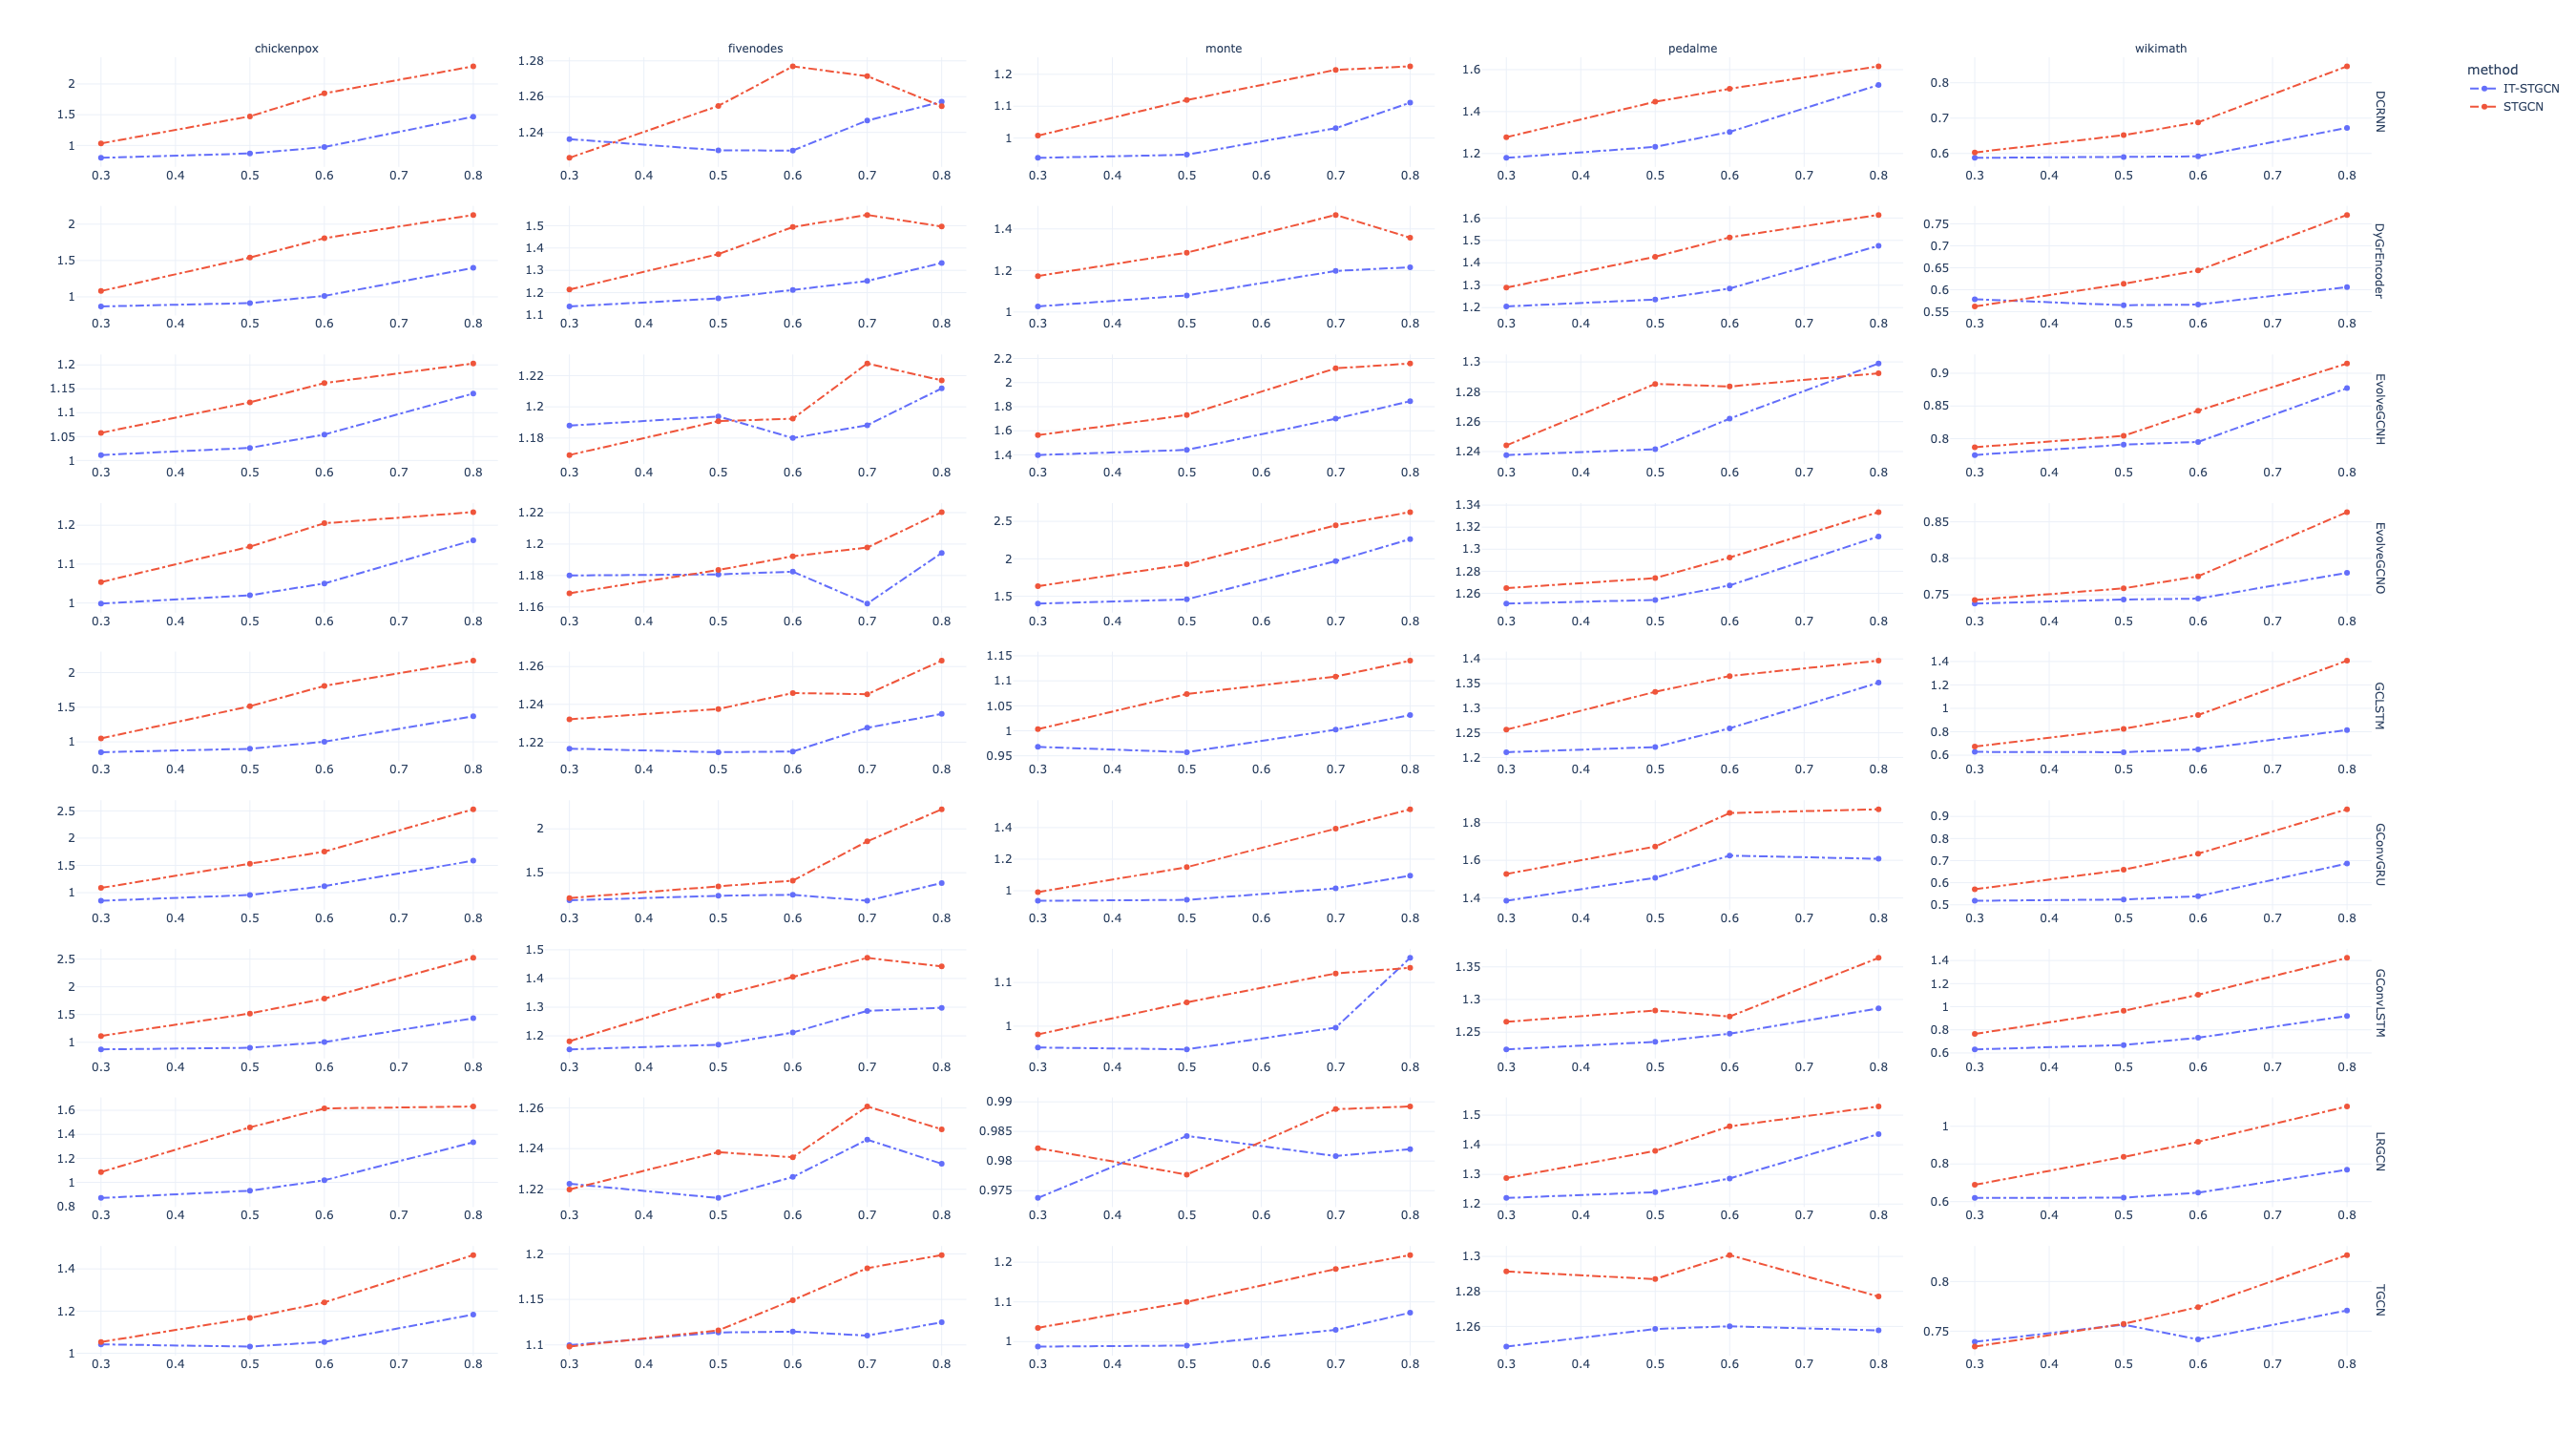

In [598]:
fig = df.query("mtype=='rand'").query("dataset != 'windmillsmall'")\
.groupby(["method","dataset","mrate","model"]).agg({'mse':'mean'}).reset_index()\
.plot.line(
    x='mrate',
    y='mse',
    color='method',
    facet_row='model',
    facet_col='dataset',
    width=1200,
    height=1500,
    
)

for scatter in fig.data:
    scatter['mode'] = 'lines+markers'
    scatter['line']['dash'] = 'dashdot'
for annotation in fig.layout['annotations']:
    annotation['text'] = annotation['text'].replace('dataset=','')
    annotation['text'] = annotation['text'].replace('model=','')
for k in [k for k in fig.layout if 'xaxis' in k]:
    fig.layout[k]['title']['text'] = None 
for k in [k for k in fig.layout if 'yaxis' in k]:
    fig.layout[k]['title']['text'] = None 
fig.update_yaxes(showticklabels=True,matches=None)
fig.update_xaxes(showticklabels=True,matches=None)

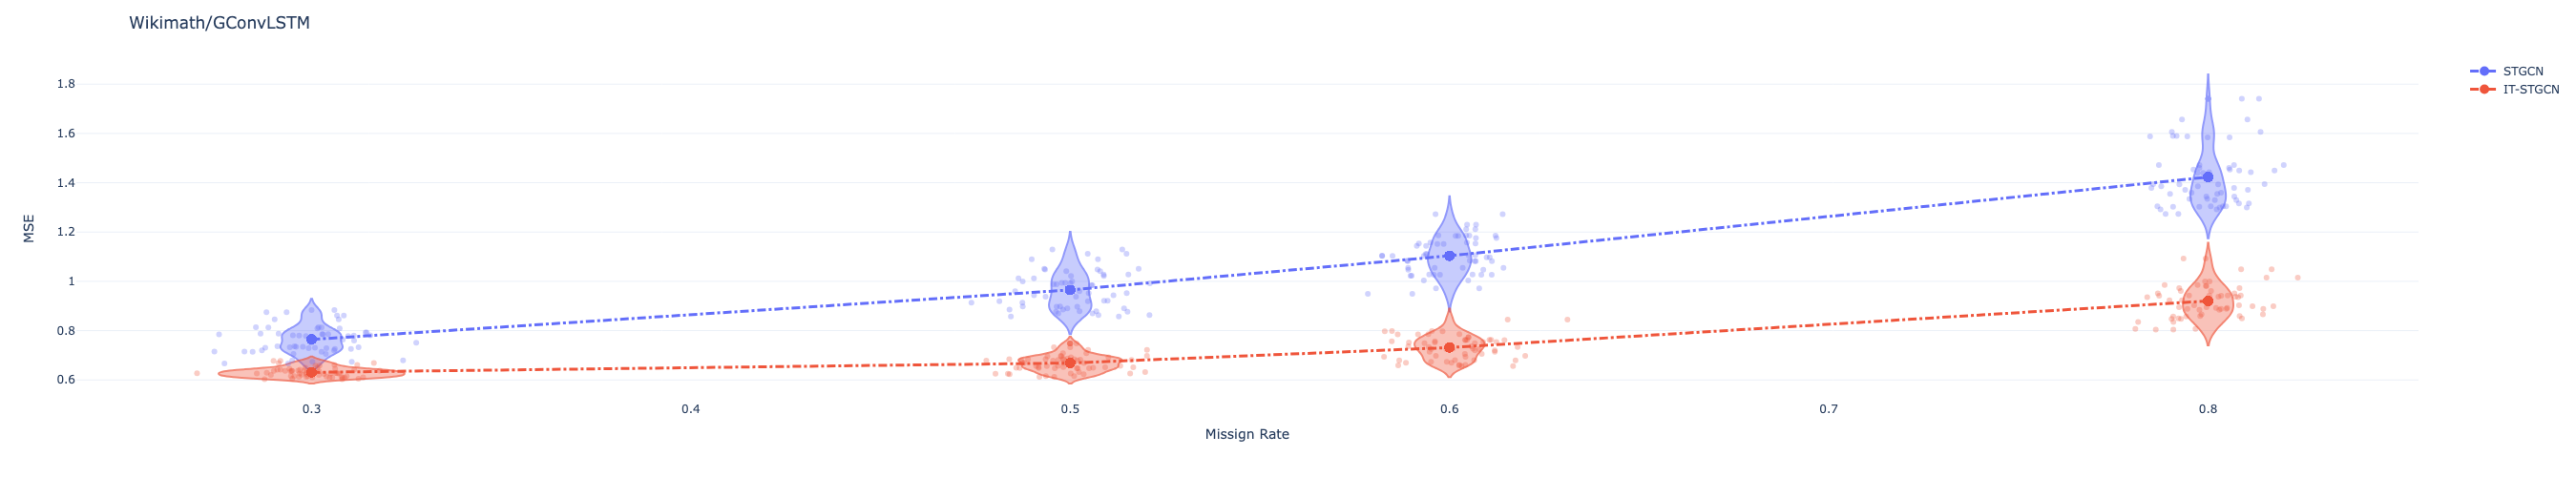

In [604]:
big = df.query("mtype=='rand'").query("dataset == 'wikimath'").query("model == 'GConvLSTM'").sort_values(by='mrate')\
.assign(mrate_jittered = lambda df: np.array(df['mrate'])+np.random.randn(len(df['mrate']))*0.01)
small = big.groupby(["dataset","mrate","method"]).agg({'mse':'mean'}).reset_index().rename({'mse':'mse_mean'},axis=1)
tidydata = big.merge(small)
tidydata['mrate'] = tidydata['mrate'].astype(str)
fig = px.scatter(
    tidydata,
    y='mse',
    x='mrate_jittered',
    opacity=0.3,
    color='method',
    width=750,
    height=500,
)
_fig1 = px.scatter(
    tidydata,
    y='mse_mean',
    x='mrate',
    color='method',
)
_fig1.data[0]['mode']='markers+lines'
_fig1.data[0]['marker']['size'] = 10
_fig1.data[0]['line']['width'] = 3
_fig1.data[0]['line']['dash'] = 'dashdot'
_fig1.data[1]['mode']='markers+lines'
_fig1.data[1]['marker']['size'] = 10
_fig1.data[1]['line']['width'] = 3
_fig1.data[1]['line']['dash'] = 'dashdot'
_fig2 = px.violin(
    tidydata.query("method=='STGCN'"),
    y='mse',
    x='mrate',
)
_fig2.data[0]['opacity']=0.7
_fig2.data[0]['marker']['color']='#636efa'
_fig3 = px.violin(
    tidydata.query("method=='IT-STGCN'"),
    y='mse',
    x='mrate',
)
_fig3.data[0]['opacity']=0.7
_fig3.data[0]['marker']['color']='#EF553B'
_fig3
for g in _fig1.data:
    fig.add_trace(g)
for g in _fig2.data:
    fig.add_trace(g)
for g in _fig3.data:
    fig.add_trace(g)
fig.data[0]['showlegend'] =False
fig.data[1]['showlegend'] =False
fig.layout['xaxis']['title']['text']='Missign Rate'
fig.layout['yaxis']['title']['text']='MSE'
fig.layout['legend']['title']['text']=""
fig.layout['title']['text']='Wikimath/GConvLSTM'
fig

## 2.1 Time

In [ ]:
df_dataset = pd.DataFrame([[i,0,0] for i in set(df.dataset)])
df_dataset.columns = ['dataset','node','time']

dataset_values = {
    'fivenodes': {'time': 200, 'node': 5},
    'chickenpox': {'time': 522, 'node': 20},
    'pedalme': {'time': 36, 'node': 15},
    'wikimath': {'time': 731, 'node': 1068},
    'windmillsmall': {'time': 17472, 'node': 11},
    'monte': {'time': 744, 'node': 675},
}

for dataset, values in dataset_values.items():
    df_dataset.loc[df_dataset['dataset'] == dataset, ['time', 'node']] = values.values()

df_dataset

df_dataset

**time이 적은 pedalme 데이터와 time이 많은 windmillsmall 데이터의 결측값 비율이 높을 때(70% 혹은 80%) 비교**

- 내용 
    - 이 섹션에서는 train 데이터 양에 따라 학습 결과를 논의해보고자 한다. 데이터가 적은 pedalme(node=15, time=36) 데이터는 proposed method 가 dramatic한 낮은 error값을 보이지 않았다. 반면에 time이 긴 windmillsmall(node=11, time=17472)은 proposed method가 결측값이 많을 때 mse 값이 낮게 나온 모습을 볼 수 있었다. underline function을 추정하여 true 겂을 따라가려는 우리 방법론이 효율적이기 위해서 데이터 양이 많을 경우가 좋다. time이 길거나(예를 들어 오랜 기간 어떤 기계의 센서에서 측정된 값) node가 많은(측정 지점이 많은) 경우가 실제 시공간 데이터의 경우 많을 것을 기대하기 떄문에, proposed의 효과가 있을 경우가 존재할 것이다.
    - According to the table (dataset explanation), the Time for the 'Pedalme' dataset is 36, while the time for the 'Windmillsmall' dataset is 17,472. Thus, the two datasets have different amounts of data. We compared between two datasets, and the result is on Figure 555. The variations observed in Figure 555 for each dataset indicate that the disparity between methods is relatively small for the 'Pedalme' dataset, whereas the difference is more pronounced for the 'Windmillsmall' dataset.This phenomenon arises as the increasing quantity of data facilitates learning patterns and trends. Consequently, our approach signifies its effectiveness when there is a substantial amount of data in the time aspect. 

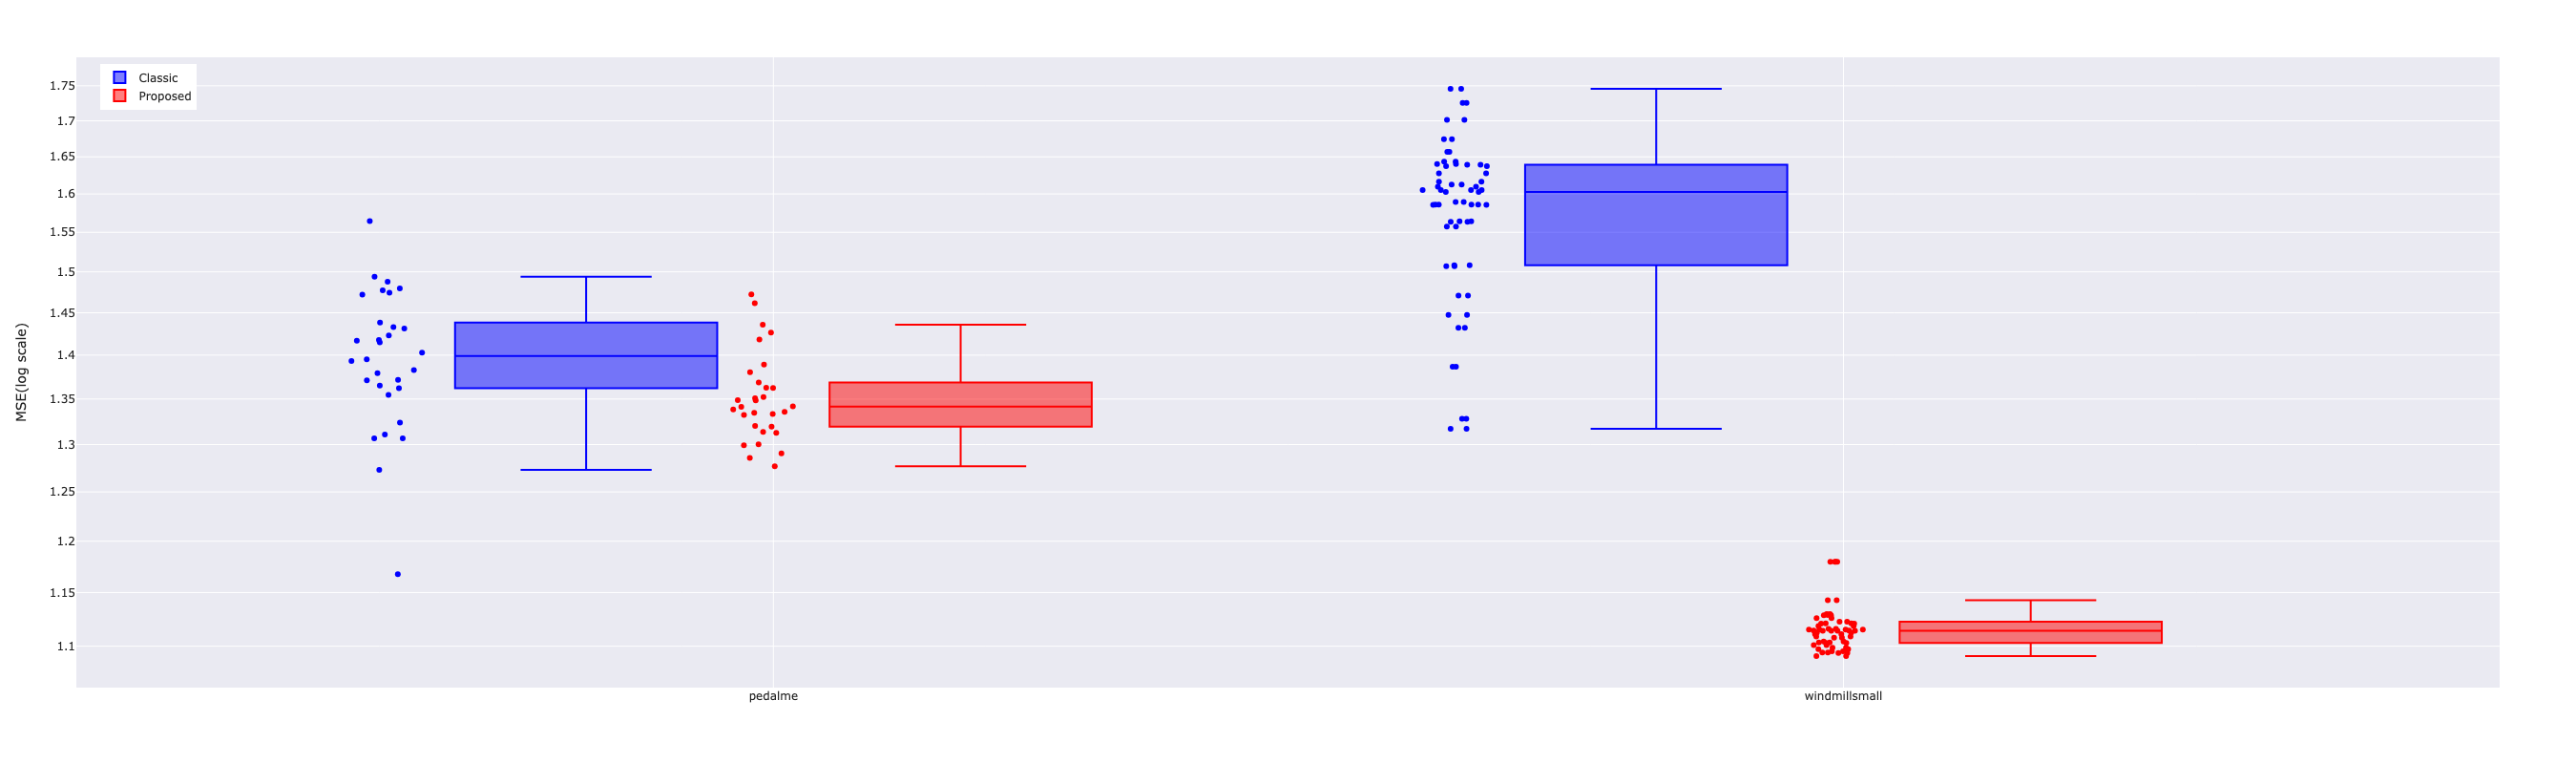

In [599]:
# pedalme node = 15 time = 36
# windmill node = 11 time = 17,472

tidydata = pd.concat([
          df.query("dataset=='pedalme' & mtype=='rand'  & model=='GCLSTM' & (mrate == 0.8)"),
          df.query("dataset=='windmillsmall' & mtype=='rand' &  model=='GCLSTM' & (mrate == 0.7)")])

tidydata['method'] = pd.Categorical(tidydata['method'], categories=['STGCN', 'IT-STGCN'])

tidydata = tidydata.sort_values(by=['dataset','model','mrate'])

fig = px.box(tidydata,x='dataset',y='mse',color='method',width=70, log_y=True, points="all")

fig.layout['xaxis']['title']['text']=''
fig.layout['yaxis']['title']['text']='MSE(log scale)'

fig.data[0]['marker']['color'] = 'blue'
fig.data[0]['name'] = 'Classic'
fig.data[1]['marker']['color'] = 'red'
fig.data[1]['name'] = 'Proposed'

# fig.layout.annotations[0].text = 'Pedalme'
# fig.layout.annotations[1].text = 'Windmillsmall'

fig.layout['legend']['title']=''

fig.update_layout(template="seaborn")
fig.update_layout(title_text="")
fig.update_layout(height=800, width=1800)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
 ))

fig

## 2.2 Node

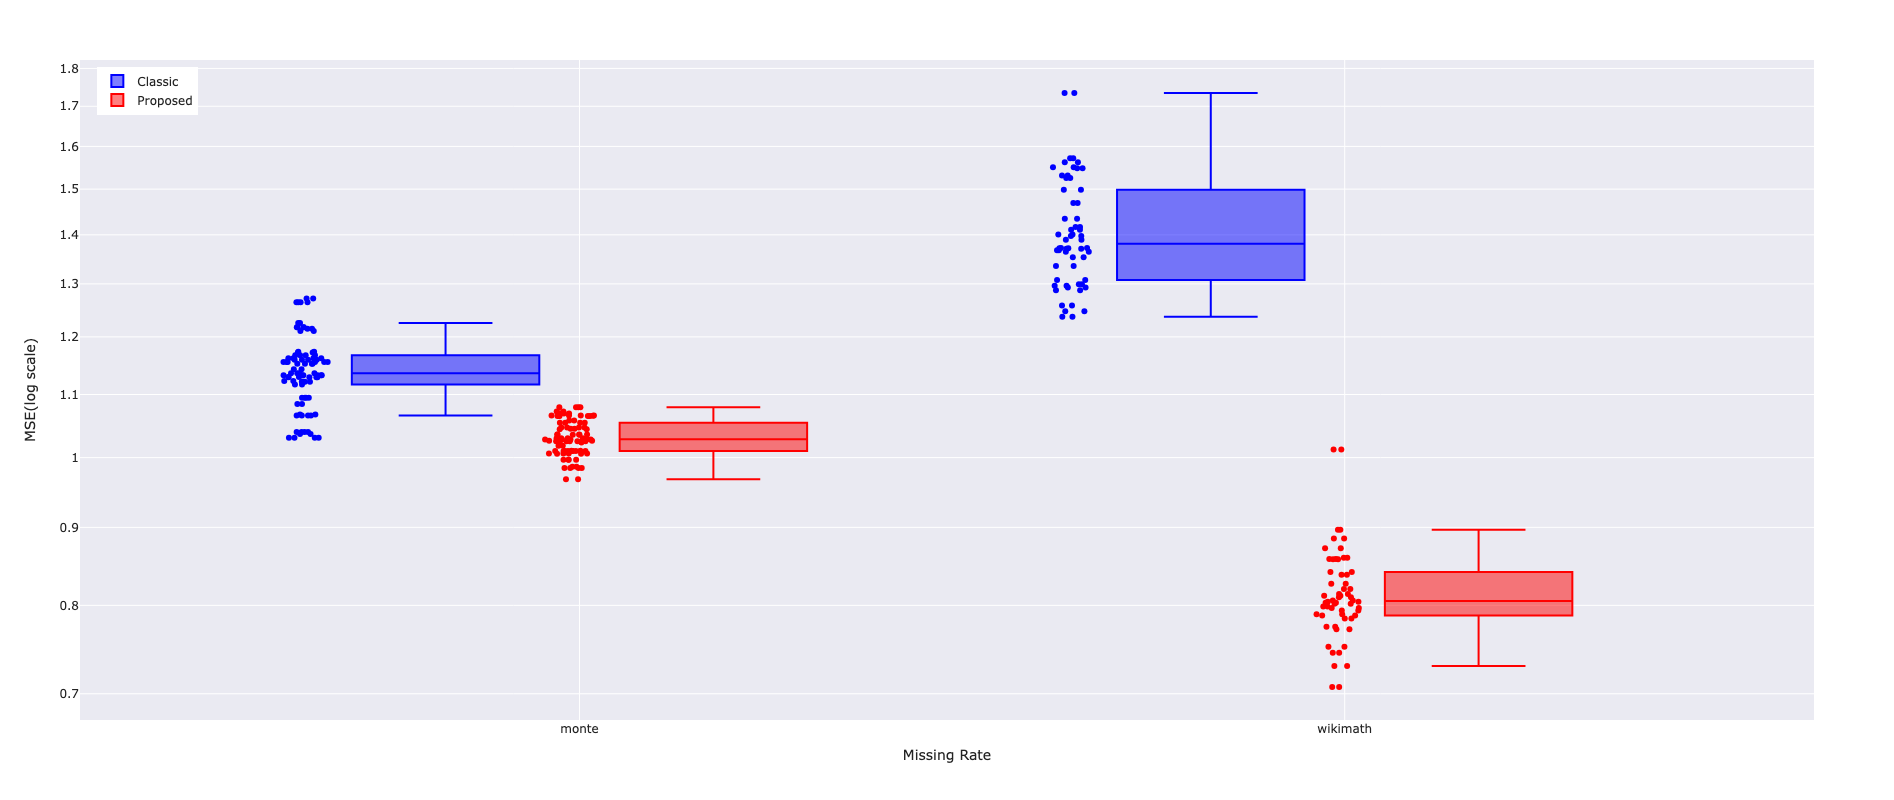

In [511]:
# wikimath nodes = 1068 time = 731
# monte nodes = 675 time = 744

tidydata = pd.concat([
          df.query("dataset=='wikimath' & mtype=='rand'  & model=='GCLSTM' & (mrate == 0.8)"),
          df.query("dataset=='monte' & mtype=='rand' &  model=='GCLSTM' & (mrate == 0.8)")])

tidydata['method'] = pd.Categorical(tidydata['method'], categories=['STGCN', 'IT-STGCN'])

tidydata = tidydata.sort_values(by=['dataset','model','mrate'])

fig = px.box(tidydata,x='dataset',y='mse',color='method',width=70, log_y=True, points="all")

fig.layout['xaxis']['title']['text']='Missing Rate'
fig.layout['yaxis']['title']['text']='MSE(log scale)'

fig.data[0]['marker']['color'] = 'blue'
fig.data[0]['name'] = 'Classic'
fig.data[1]['marker']['color'] = 'red'
fig.data[1]['name'] = 'Proposed'

fig.layout['legend']['title']=''

fig.update_layout(template="seaborn")
fig.update_layout(title_text="")
fig.update_layout(height=800, width=1800)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
 ))

fig

In [477]:
# fivenodes = pd.concat([
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==12) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='GConvGRU') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==12) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='GConvLSTM') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==4) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='GCLSTM') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==4) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='LRGCN') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==12) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='DyGrEncoder') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['lags']==2) & 
#        (df['epoch']==50) & (df['model']=='EvolveGCNH') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['lags']==2) & 
#        (df['epoch']==50) & (df['model']=='EvolveGCNO') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==12) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='TGCN') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))],
#     df[(df['dataset']=='fivenodes') & (df['mtype']=='rand') & (df['inter_method']=='linear') & (df['nof_filters']==2) & 
#        (df['lags']==2) & (df['epoch']==50) & (df['model']=='DCRNN') & (df['mrate'].isin([0.3, 0.5, 0.6, 0.7, 0.8]))]
# ])
# fivenodes['nodes'] = 5
# fivenodes['time'] = 200
# fivenodes = fivenodes.query("mrate==0.8")

# chickenpox = pd.concat([
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GConvGRU' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==32 & lags==4 & epoch==50 & model=='GConvLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='GCLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==8 & lags==4 & epoch==50 & model=='LRGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNH' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & lags==4 & epoch==50 & model=='EvolveGCNO' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==4 & epoch==50 & model=='TGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='chickenpox' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==4 & epoch==50 & model=='DCRNN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)")
# ])
# chickenpox['nodes'] = 20
# chickenpox['time'] = 522
# chickenpox = chickenpox.query("mrate==0.8")

# pedalme = pd.concat([
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==2 & lags==4 & epoch==50 & model=='GConvLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==4 & lags==4 & epoch==50 & model=='GCLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==8 & lags==4 & epoch==50 & model=='LRGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & lags==4 & epoch==50 & model=='EvolveGCNH' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & lags==4 & epoch==50 & model=='EvolveGCNO' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='TGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='pedalme' & mtype=='rand' & inter_method == 'nearest' & nof_filters==8 & lags==4 & epoch==50 & model=='DCRNN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)")
# ], ignore_index=True)
# pedalme['nodes'] = 15
# pedalme['time'] = 36

# pedalme = pedalme.query("mrate==0.8")

# wikimath = pd.concat([
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='GConvGRU' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==64 & lags==8 & epoch==50 & model=='GConvLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==64 & lags==8 & epoch==50 & model=='GCLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==32 & lags==8 & epoch==50 & model=='LRGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='DyGrEncoder' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNH' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNO' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='TGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)"),
#     df.query("dataset=='wikimath' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='DCRNN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.8)")
# ], ignore_index=True)
# wikimath['nodes'] = 1068
# wikimath['time'] = 731
# wikimath = wikimath.query("mrate==0.8")

# windmillsmall = pd.concat([
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='GConvGRU' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==8 & epoch==50 & model=='GConvLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==16 & lags==8 & epoch==50 & model=='GCLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='LRGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='DyGrEncoder' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNH' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & lags==8 & epoch==50 & model=='EvolveGCNO' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==12 & lags==8 & epoch==50 & model=='TGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)"),
#     df.query("dataset=='windmillsmall' & mtype=='rand' & inter_method == 'linear' & nof_filters==4 & lags==8 & epoch==50 & model=='DCRNN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.6 | mrate == 0.7)")
# ], ignore_index=True)
# windmillsmall['nodes'] = 11
# windmillsmall['time'] = 17472
# windmillsmall = windmillsmall.query("mrate==0.7")

# monte = pd.concat([
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvGRU' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GConvLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='GCLSTM' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==2 & lags==4 & epoch==50 & model=='LRGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='DyGrEncoder' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & lags==4 & epoch==50 & model=='EvolveGCNH' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & lags==4 & epoch==50 & model=='EvolveGCNO' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==8 & lags==4 & epoch==50 & model=='TGCN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)"),
#     df.query("dataset=='monte' & mtype=='rand' & inter_method == 'nearest' & nof_filters==12 & lags==4 & epoch==50 & model=='DCRNN' & (mrate == 0.3 | mrate == 0.5 | mrate == 0.7 | mrate == 0.8)")
# ], ignore_index=True)
# monte['nodes'] = 675
# monte['time'] = 744
# monte = monte.query("mrate==0.8")

# tidydata = pd.concat([fivenodes, chickenpox, pedalme, wikimath,windmillsmall, monte])

# tidydata = tidydata.sort_values(by=['time'])
# tidydata['model'] = pd.Categorical(tidydata['model'], categories=["GConvGRU", "GConvLSTM", "GCLSTM", "LRGCN", "DyGrEncoder", "EvolveGCNH", "EvolveGCNO", "TGCN", "DCRNN"])
# tidydata['method'] = pd.Categorical(tidydata['method'], categories=['STGCN', 'IT-STGCN'])
# tidydata['time'] = tidydata['time'].astype(str)

# fig = px.strip(tidydata,x='time',y='mse',log_y=True,color='model',facet_col='method')
# fig.layout.annotations[0].text = 'Classic'
# fig.layout.annotations[1].text = 'Proposed'

# fig.layout.xaxis.title.text = ''
# fig.layout.xaxis2.title.text = ''

# fig.layout.yaxis2.showticklabels = True

# fig.update_layout(template="seaborn")
# fig.update_layout(title_text="")
# fig.update_layout(height=1000, width=1800)
# fig.update_layout(legend=dict(
#     yanchor="top",
#     y=0.99,
#     xanchor="left",
#     x=0.01
#  ))
# fig

# 3 Interpolation

## 3.1 Linear vs Nearest

**Interpolation 에 따라, block은 시각적으로 보이기 좋지 않은 예시**

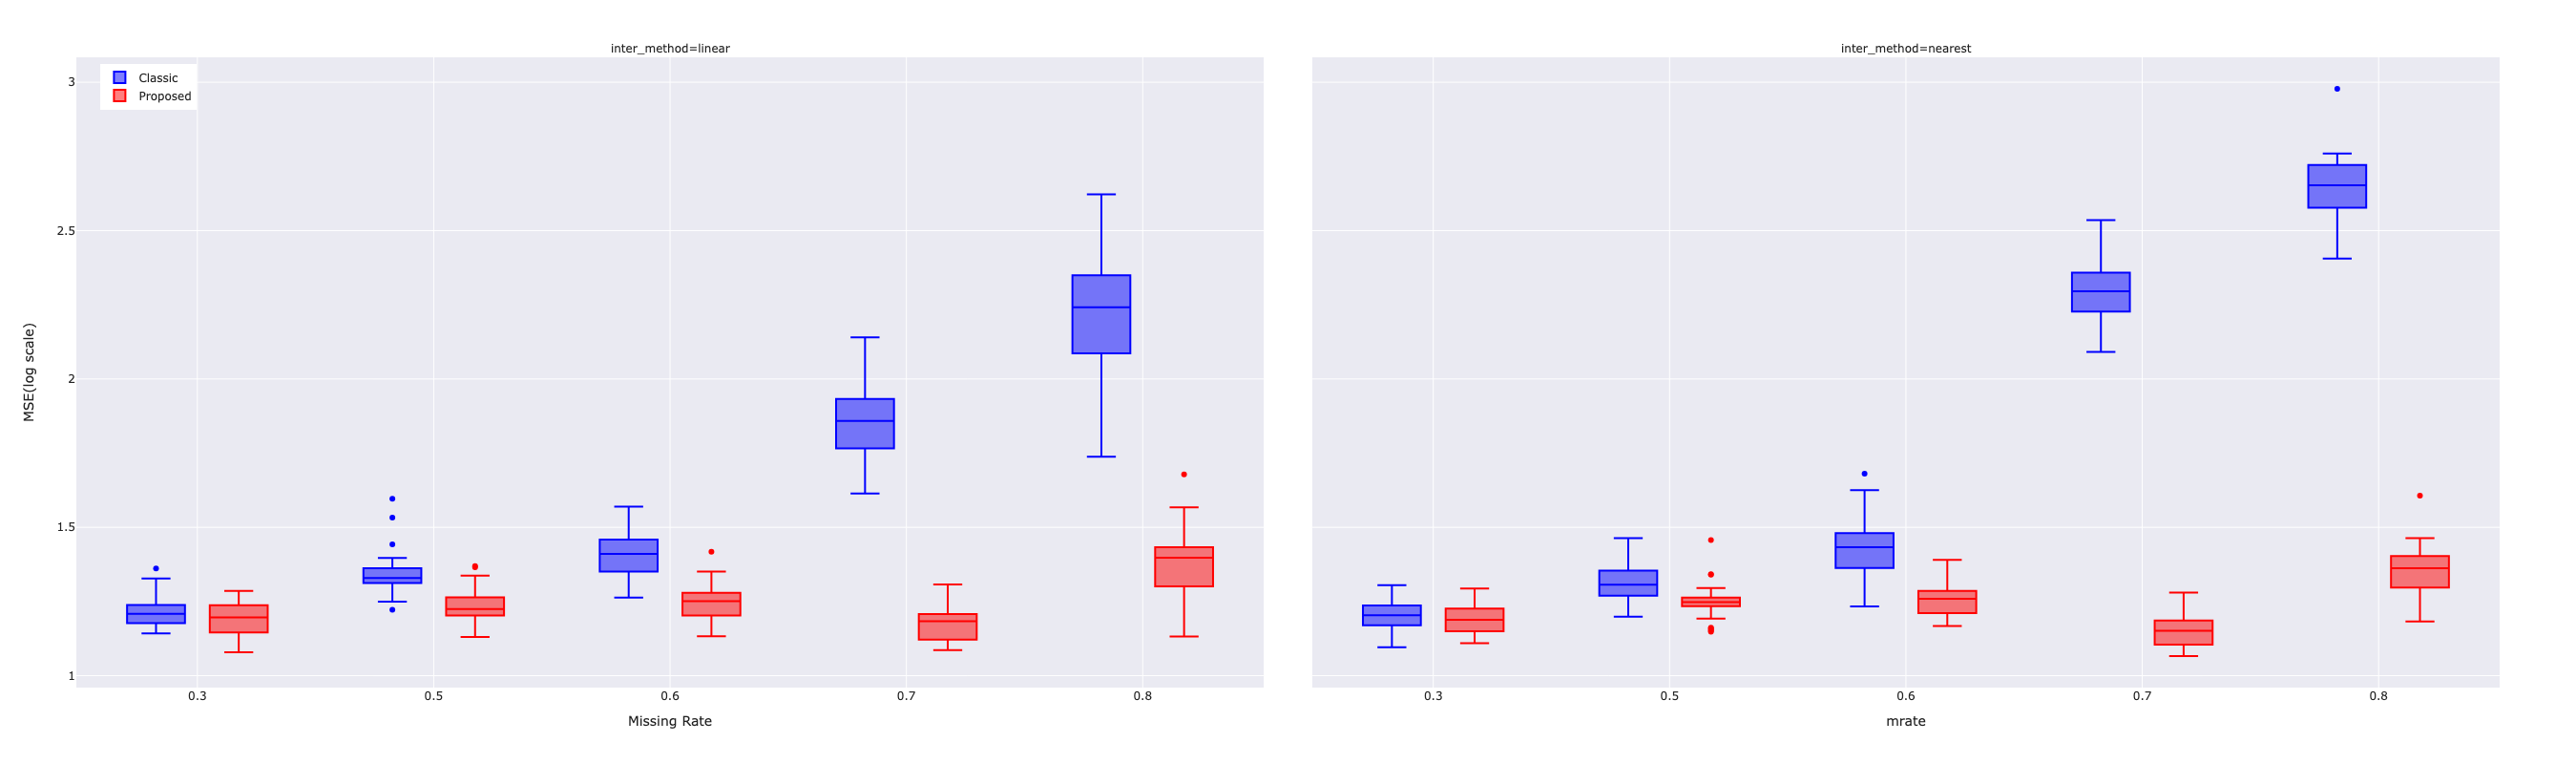

In [496]:
tt = nearest_fivenodes.query("dataset=='fivenodes'  and method!='GNAR' and mtype=='rand'  and nof_filters==12 and lags==2 and epoch==50 and model=='GConvGRU' and mrate in [0.3  , 0.5  , 0.6 ,0.7  , 0.8]")
tt['mrate'] = tt['mrate'].astype(str)
tt = tt.sort_values(by=['model','mrate'])
tt['method'] = pd.Categorical(tt['method'], categories=['STGCN', 'IT-STGCN'])

fig = px.box(tt,x='mrate',y='mse',color='method',facet_col='inter_method')

fig.layout['xaxis']['title']['text']='Missing Rate'
fig.layout['yaxis']['title']['text']='MSE(log scale)'

fig.data[0]['marker']['color'] = 'blue'
fig.data[0]['name'] = 'Classic'
fig.data[1]['marker']['color'] = 'blue'
fig.data[1]['name'] = 'Classic'
fig.data[2]['marker']['color'] = 'red'
fig.data[2]['name'] = 'Proposed'
fig.data[3]['marker']['color'] = 'red'
fig.data[3]['name'] = 'Proposed'

fig.layout['legend']['title']=''

fig.update_layout(template="seaborn")
fig.update_layout(title_text="")
fig.update_layout(height=800, width=1800)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
 ))
fig

In [566]:
nearest_fivenodes.model.unique()

array(['GConvGRU', 'GConvLSTM', 'GCLSTM', 'LRGCN', 'DyGrEncoder',
       'EvolveGCNH', 'EvolveGCNO', 'TGCN', 'DCRNN'], dtype=object)

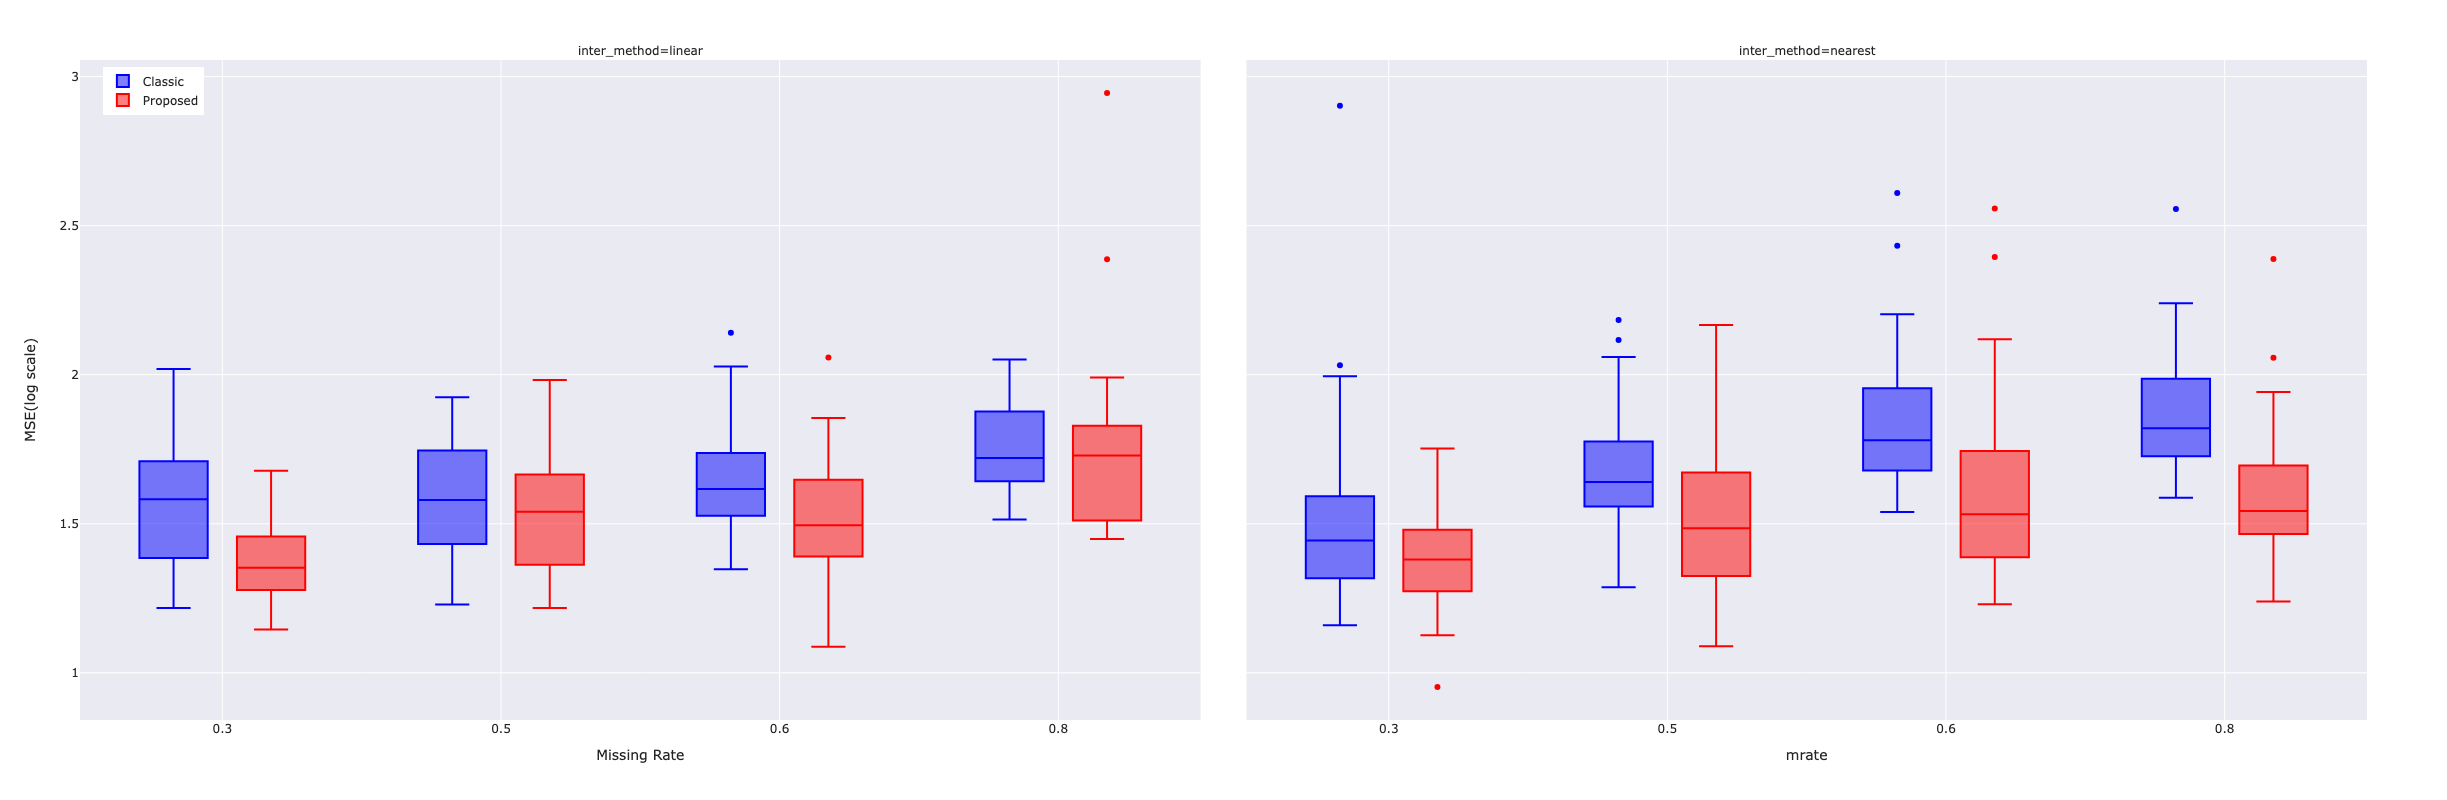

In [422]:
tt = nearest_pedalme.query("dataset=='pedalme' and method!='GNAR' and mtype=='rand' and nof_filters==12 and lags==4 and epoch==50 and model=='GConvGRU' and mrate in [0.3,0.5,0.6,0.8]")
tt['mrate'] = tt['mrate'].astype(str)
tt = tt.sort_values(by=['model','mrate'])
fig = px.box(tt,x='mrate',y='mse',color='method',facet_col='inter_method')
fig.layout['xaxis']['title']['text']='Missing Rate'
fig.layout['yaxis']['title']['text']='MSE(log scale)'

fig.data[0]['marker']['color'] = 'blue'
fig.data[0]['name'] = 'Classic'
fig.data[1]['marker']['color'] = 'blue'
fig.data[1]['name'] = 'Classic'
fig.data[2]['marker']['color'] = 'red'
fig.data[2]['name'] = 'Proposed'
fig.data[3]['marker']['color'] = 'red'
fig.data[3]['name'] = 'Proposed'

fig.layout['legend']['title']=''

fig.update_layout(template="seaborn")
fig.update_layout(title_text="")
fig.update_layout(height=800, width=1800)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
 ))
fig

# 4 Missing Type

## 4.1 Block vs random

<ipython-input-503-ca5cc873e6d7>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



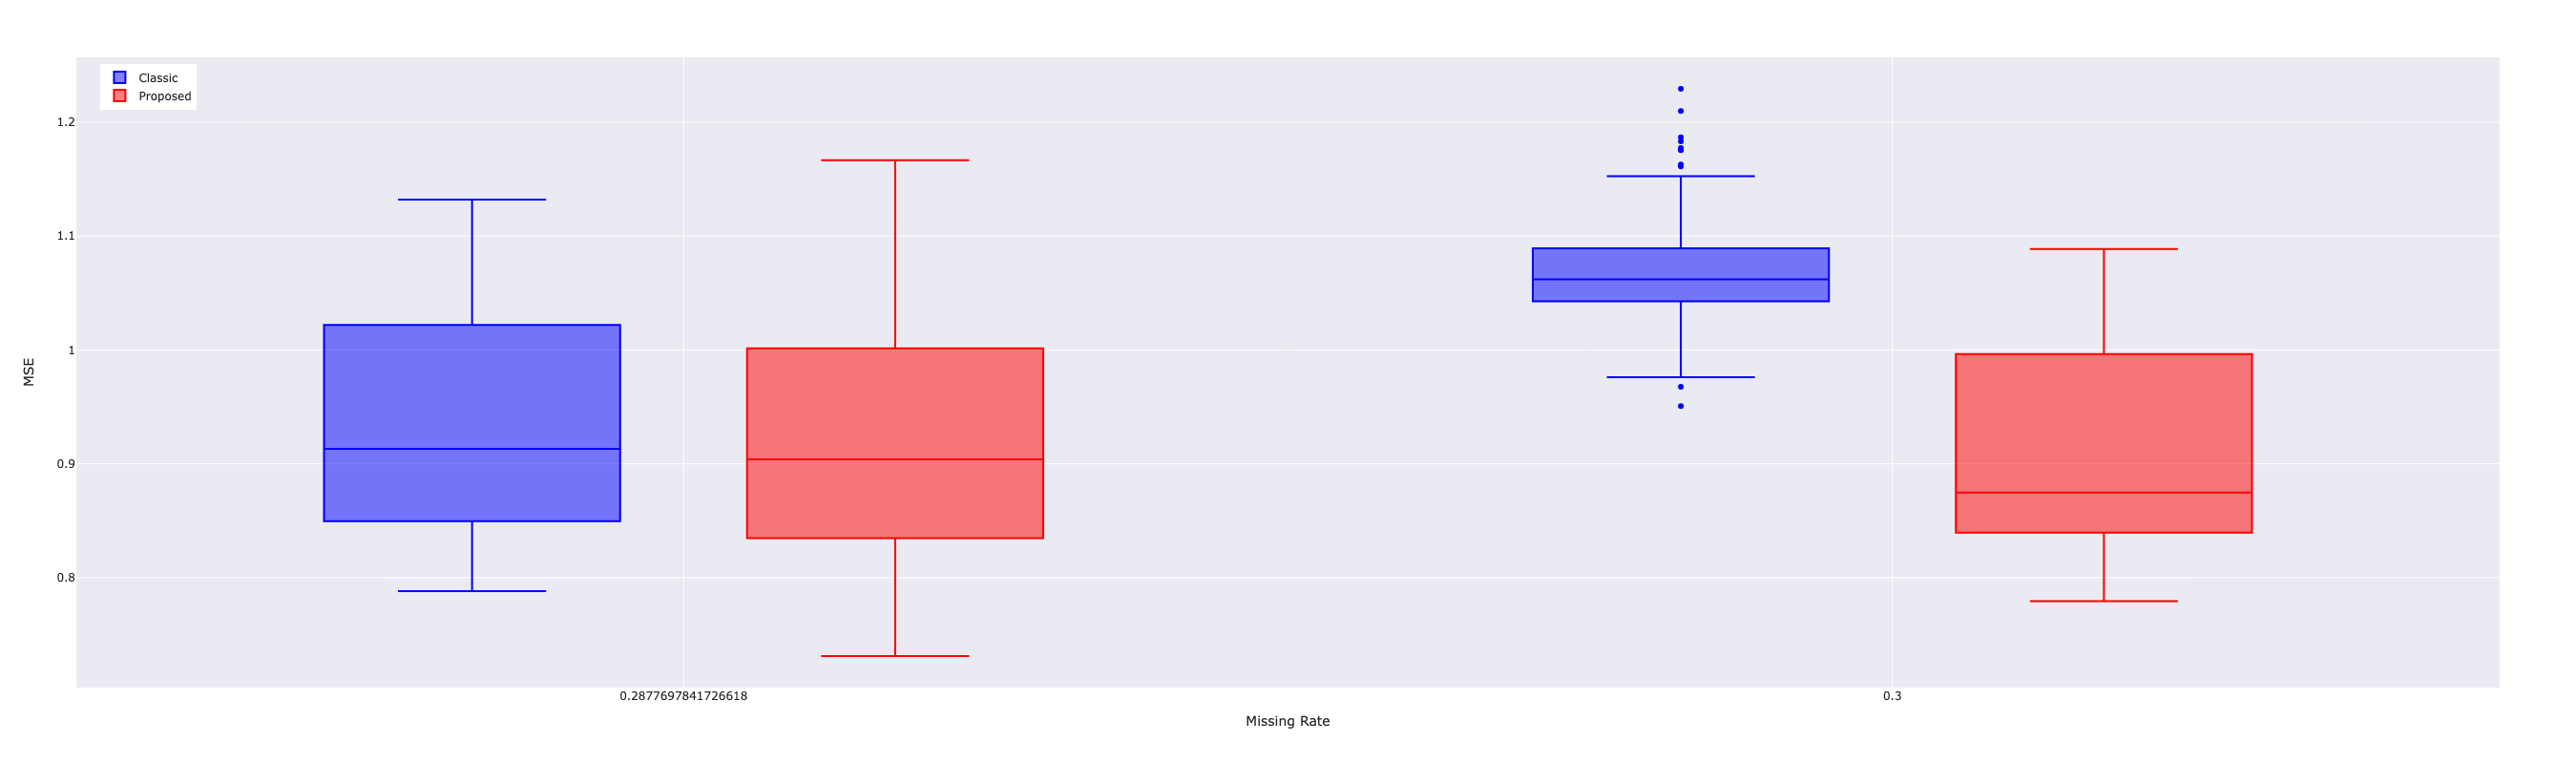

In [503]:
tt=df.query("mtype in ['rand','block'] and mrate in [0.2877697841726618, 0.3] and dataset=='chickenpox'")
tt['mrate'] = tt['mrate'].astype(str)
tt = tt.sort_values(by=['model','mrate'])

fig = px.box(tt,x='mrate',y='mse',color='method')
fig.layout['xaxis']['title']['text']='Missing Rate'
fig.layout['yaxis']['title']['text']='MSE'

fig.data[0]['marker']['color'] = 'blue'
fig.data[0]['name'] = 'Classic'
fig.data[1]['marker']['color'] = 'red'
fig.data[1]['name'] = 'Proposed'

fig.layout['legend']['title']=''

fig.update_layout(template="seaborn")
fig.update_layout(title_text="")
fig.update_layout(height=800, width=1800)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
 ))
fig

<ipython-input-504-546b2f681aff>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



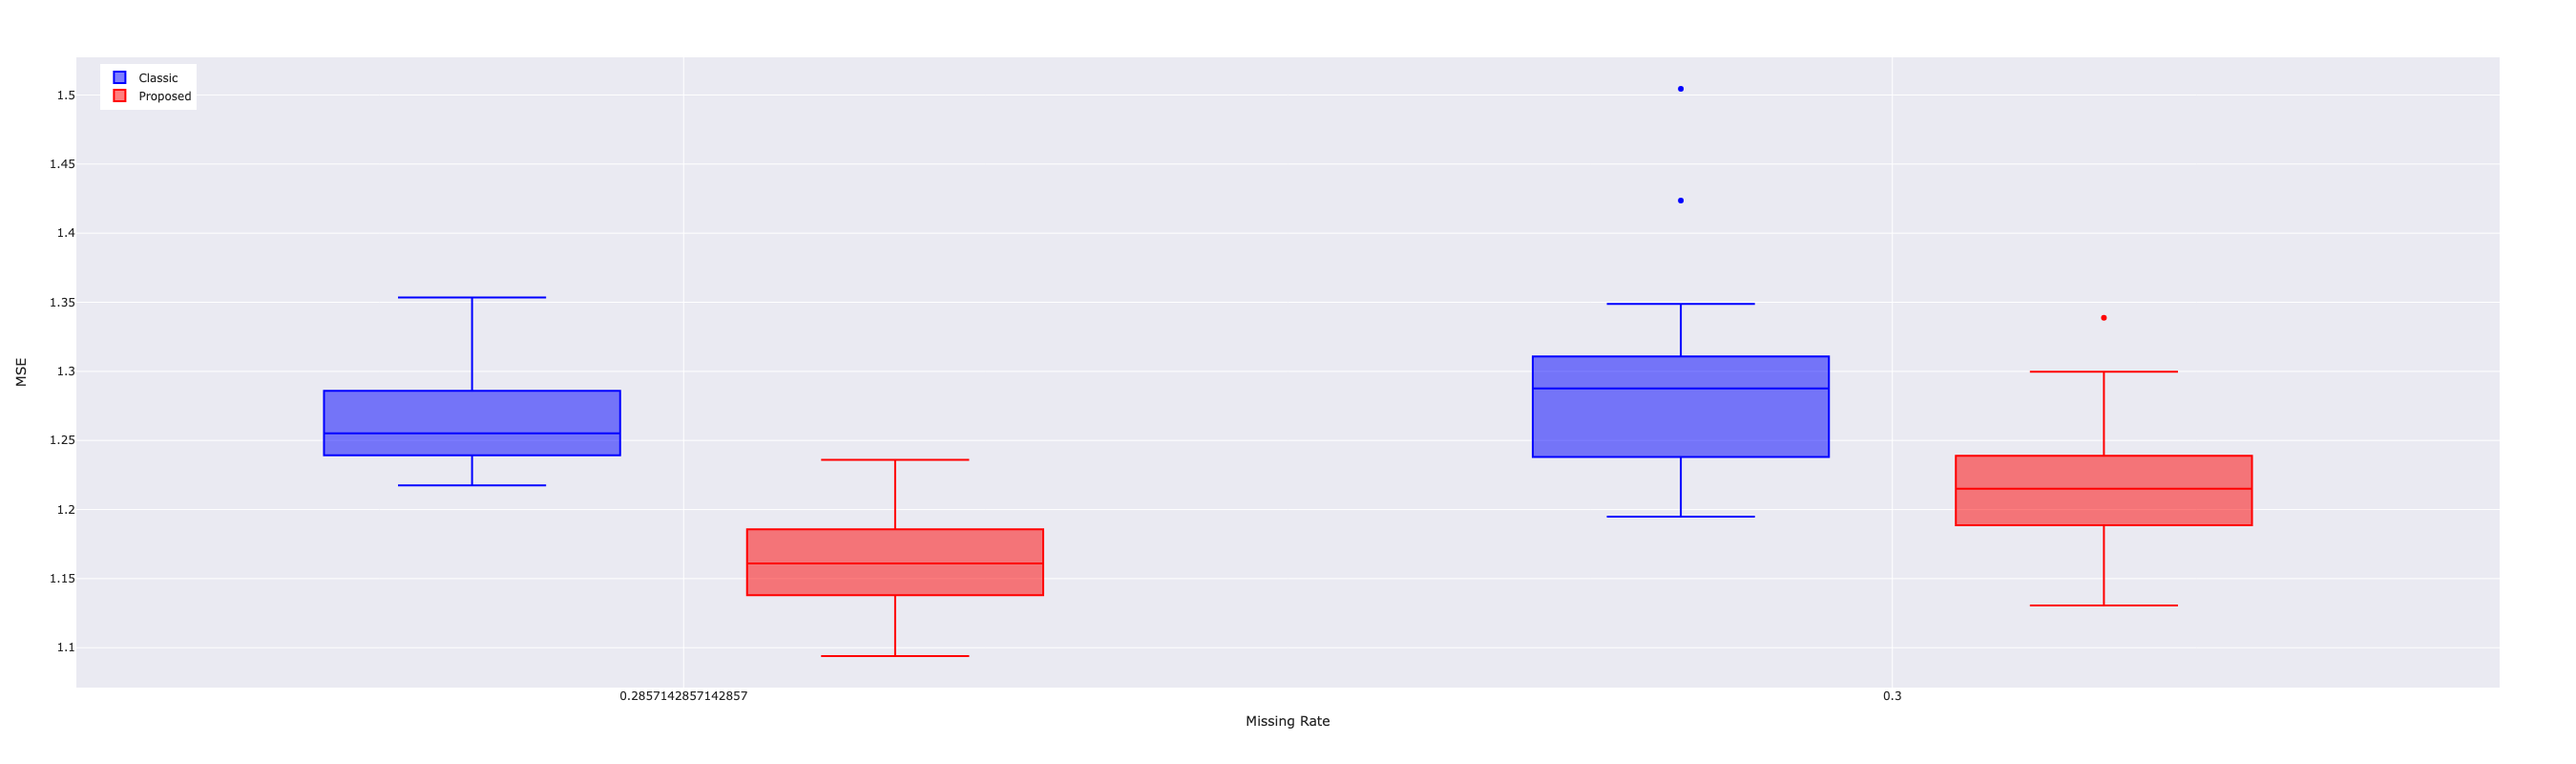

In [504]:
tt=df.query("mtype in ['rand','block'] and mrate in [0.2857142857142857, 0.3] and model=='LRGCN' and dataset=='pedalme'")
tt['mrate'] = tt['mrate'].astype(str)
tt = tt.sort_values(by=['model','mrate'])

fig = px.box(tt,x='mrate',y='mse',color='method')
fig.layout['xaxis']['title']['text']='Missing Rate'
fig.layout['yaxis']['title']['text']='MSE'

fig.data[0]['marker']['color'] = 'blue'
fig.data[0]['name'] = 'Classic'
fig.data[1]['marker']['color'] = 'red'
fig.data[1]['name'] = 'Proposed'

fig.layout['legend']['title']=''

fig.update_layout(template="seaborn")
fig.update_layout(title_text="")
fig.update_layout(height=800, width=1800)

fig.update_layout(legend=dict(
    yanchor="top",
    y=0.99,
    xanchor="left",
    x=0.01
 ))
fig